In [1]:
# Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_excel("../veritoplama/EmlakVerileri.xlsx")

In [3]:
data.head()

,Aidat,Balkon Durumu,Balkon Metrekare,Balkon Sayısı,Balkon Tipi,Balkon Tipi Kapalı Balkon,Banyo Metrekare,Banyo Sayısı,Binanın Kat Sayısı,Binanın Yaşı,...,WC Metrekare,WC Sayısı,Yapı Durumu,Yapı Tipi,İlan Güncelleme Tarihi,İlan Numarası,İlan Oluşturma Tarihi,Url,Fiyat,Lokasyon
0,100 TL,Var,8 M2,1,Açık Balkon,NaN,6 M2,1,5.0,21 Ve Üzeri,...,4 M2,1,İkinci El,Betonarme,17 Aralık 2023,14410960.0,17 Aralık 2023,https://emlakjet.com//ilan/aydinlik-ev-14410960/,8.000 TL,Bursa - Yıldırım - Musababa Mh.
1,NaN,Var,NaN,1,NaN,NaN,NaN,2,9.0,0 (Yeni),...,NaN,NaN,NaN,NaN,18 Aralık 2023,14407317.0,16 Aralık 2023,https://emlakjet.com//ilan/bursa-osmangazi-yun...,16.000 TL,Bursa - Osmangazi - Güneştepe Mh.
2,2 TL,Yok,NaN,NaN,NaN,NaN,NaN,1,3.0,21 Ve Üzeri,...,NaN,NaN,NaN,NaN,15 Aralık 2023,14401862.0,15 Aralık 2023,https://emlakjet.com//ilan/bengisu-gayrimenkul...,6.000 TL,Bursa - Yıldırım - Piremir Mh.
3,200 TL,Var,NaN,2,Kapalı Balkon,NaN,NaN,1,5.0,21 Ve Üzeri,...,NaN,2,İkinci El,Betonarme,15 Aralık 2023,14401379.0,15 Aralık 2023,https://emlakjet.com//ilan/bursa-nilufer-karam...,15.000 TL,Bursa - Nilüfer - Karaman Mh.
4,0 TL,Yok,NaN,NaN,NaN,NaN,NaN,1,4.0,11-15,...,NaN,2,İkinci El,Betonarme,16 Aralık 2023,14398028.0,14 Aralık 2023,https://emlakjet.com//ilan/md-gayrimenkulden-b...,9.000 TL,Bursa - Gürsu - Kurtuluş Mh.


## Veri Ön İşleme

In [4]:
# Aktarımda site tarafından verilmeyen bazı boş bilgileri filtreleme işlemi
filtered_data = data[data.apply(lambda row: row.count() > 3, axis=1)]
filtered_data.head()

,Aidat,Balkon Durumu,Balkon Metrekare,Balkon Sayısı,Balkon Tipi,Balkon Tipi Kapalı Balkon,Banyo Metrekare,Banyo Sayısı,Binanın Kat Sayısı,Binanın Yaşı,...,WC Metrekare,WC Sayısı,Yapı Durumu,Yapı Tipi,İlan Güncelleme Tarihi,İlan Numarası,İlan Oluşturma Tarihi,Url,Fiyat,Lokasyon
0,100 TL,Var,8 M2,1,Açık Balkon,NaN,6 M2,1,5.0,21 Ve Üzeri,...,4 M2,1,İkinci El,Betonarme,17 Aralık 2023,14410960.0,17 Aralık 2023,https://emlakjet.com//ilan/aydinlik-ev-14410960/,8.000 TL,Bursa - Yıldırım - Musababa Mh.
1,NaN,Var,NaN,1,NaN,NaN,NaN,2,9.0,0 (Yeni),...,NaN,NaN,NaN,NaN,18 Aralık 2023,14407317.0,16 Aralık 2023,https://emlakjet.com//ilan/bursa-osmangazi-yun...,16.000 TL,Bursa - Osmangazi - Güneştepe Mh.
2,2 TL,Yok,NaN,NaN,NaN,NaN,NaN,1,3.0,21 Ve Üzeri,...,NaN,NaN,NaN,NaN,15 Aralık 2023,14401862.0,15 Aralık 2023,https://emlakjet.com//ilan/bengisu-gayrimenkul...,6.000 TL,Bursa - Yıldırım - Piremir Mh.
3,200 TL,Var,NaN,2,Kapalı Balkon,NaN,NaN,1,5.0,21 Ve Üzeri,...,NaN,2,İkinci El,Betonarme,15 Aralık 2023,14401379.0,15 Aralık 2023,https://emlakjet.com//ilan/bursa-nilufer-karam...,15.000 TL,Bursa - Nilüfer - Karaman Mh.
4,0 TL,Yok,NaN,NaN,NaN,NaN,NaN,1,4.0,11-15,...,NaN,2,İkinci El,Betonarme,16 Aralık 2023,14398028.0,14 Aralık 2023,https://emlakjet.com//ilan/md-gayrimenkulden-b...,9.000 TL,Bursa - Gürsu - Kurtuluş Mh.


In [5]:
# Fiyatlandırma için filtreleme
df = pd.DataFrame()
df["Lokasyon"] = filtered_data["Lokasyon"]
df["Yapı Durumu"] = filtered_data["Yapı Durumu"]
df["Site İçerisinde"] = filtered_data["Site İçerisinde"]
df["Oda Sayısı"] = filtered_data["Oda Sayısı"]
df["Net Metrekare"] = filtered_data["Net Metrekare"]
df["Isıtma Tipi"] = filtered_data["Isıtma Tipi"]
df["Eşya Durumu"] = filtered_data["Eşya Durumu"]
df["Bulunduğu Kat"] = filtered_data["Bulunduğu Kat"]
df["Binanın Yaşı"] = filtered_data["Binanın Yaşı"]
df["Binanın Kat Sayısı"] = filtered_data["Binanın Kat Sayısı"]
df["Balkon Durumu"] = filtered_data["Balkon Durumu"]
df["Banyo Sayısı"] = filtered_data["Banyo Sayısı"]
df["WC Sayısı"] = filtered_data["WC Sayısı"]
df["Aidat"] = filtered_data["Aidat"]
df["Fiyat"] = filtered_data["Fiyat"]

In [6]:
# Günlük Daireleri ve Absürt Fiyatlandırmaları Filtreleme [Kiralık kısmına koyulan satılık daireler]
# Fiyat sütununu temizleme ve sayısal formata dönüştürme
df['Fiyat'] = df['Fiyat'].replace('[^\d,]', '', regex=True).str.replace(',', '.').astype(float)

# Fiyatı 1000'den küçük veya 100000'den büyük olan satırları dropla
df = df[(df['Fiyat'] >= 1000) & (df['Fiyat'] <= 100000)]

# Minimum ve maksimum fiyatı görüntüle
min_fiyat = df['Fiyat'].min()
max_fiyat = df['Fiyat'].max()

print(f"Minimum Fiyat: {min_fiyat}")
print(f"Maksimum Fiyat: {max_fiyat}")


Minimum Fiyat: 4500.0
Maksimum Fiyat: 48000.0


In [7]:
df.head()

,Lokasyon,Yapı Durumu,Site İçerisinde,Oda Sayısı,Net Metrekare,Isıtma Tipi,Eşya Durumu,Bulunduğu Kat,Binanın Yaşı,Binanın Kat Sayısı,Balkon Durumu,Banyo Sayısı,WC Sayısı,Aidat,Fiyat
0,Bursa - Yıldırım - Musababa Mh.,İkinci El,Hayır,3+1,100 M2,Doğalgaz Sobalı,Boş,2.Kat,21 Ve Üzeri,5.0,Var,1,1,100 TL,8000.0
1,Bursa - Osmangazi - Güneştepe Mh.,NaN,Hayır,3+1,105 M2,Kombi Doğalgaz,NaN,4.Kat,0 (Yeni),9.0,Var,2,NaN,NaN,16000.0
2,Bursa - Yıldırım - Piremir Mh.,NaN,Hayır,1 Oda,50 M2,Doğalgaz Sobalı,NaN,Yüksek Giriş,21 Ve Üzeri,3.0,Yok,1,NaN,2 TL,6000.0
3,Bursa - Nilüfer - Karaman Mh.,İkinci El,Evet,3+1,120 M2,Kombi Doğalgaz,NaN,4.Kat,21 Ve Üzeri,5.0,Var,1,2,200 TL,15000.0
4,Bursa - Gürsu - Kurtuluş Mh.,İkinci El,Hayır,2+1,90 M2,Kombi Doğalgaz,Boş,Düz Giriş (Zemin),11-15,4.0,Yok,1,2,0 TL,9000.0


## Boş Verileri Doldurma

In [8]:
df.isna().sum()

Lokasyon                0
Yapı Durumu           537
Site İçerisinde         0
Oda Sayısı              0
Net Metrekare           0
Isıtma Tipi             0
Eşya Durumu           161
Bulunduğu Kat           0
Binanın Yaşı            0
Binanın Kat Sayısı      0
Balkon Durumu         409
Banyo Sayısı            0
WC Sayısı             501
Aidat                 539
Fiyat                   0
dtype: int64

In [9]:
# Yapı Durumu
df["Yapı Durumu"].value_counts()

Yapı Durumu
İkinci El    157
Sıfır         20
Name: count, dtype: int64

In [10]:
# Yapı Durumu
# Algoritma bina yaşı 0(Yeni) olan binaların Yapı Durumu 'Sıfır' diğerleri 'İkinci El' olarak atansın
# 'Yapı Durumu' sütunundaki NaN değerlere yönelik koşullu atama
df.loc[df['Yapı Durumu'].isna() & (df['Binanın Yaşı'] == "0 (Yeni)"), 'Yapı Durumu'] = 'Sıfır'
df.loc[df['Yapı Durumu'].isna() & (df['Binanın Yaşı'] != "0 (Yeni)"), 'Yapı Durumu'] = 'İkinci El'
df["Yapı Durumu"].isna().sum()

0

In [11]:
# Site İçerisinde
df["Site İçerisinde"].value_counts()

Site İçerisinde
Hayır    491
Evet     223
Name: count, dtype: int64

In [12]:
# Oda Sayısı
df["Oda Sayısı"].value_counts()

Oda Sayısı
2+1       306
3+1       277
1+1        48
4+1        40
5+1        10
1 Oda       7
6+1         5
Stüdyo      5
3.5+1       5
4+2         2
2.5+1       2
5+2         1
7+1         1
1.5+1       1
2+0         1
3+0         1
4+0         1
4.5+1       1
Name: count, dtype: int64

In [13]:
# Net Metrekare
df["Net Metrekare"].value_counts()

Net Metrekare
100 M2    56
120 M2    55
130 M2    48
80 M2     40
110 M2    40
          ..
170 M2     1
17 M2      1
64 M2      1
106 M2     1
185 M2     1
Name: count, Length: 85, dtype: int64

In [14]:
# Isıtma Tipi
df["Isıtma Tipi"].value_counts()

Isıtma Tipi
Kombi Doğalgaz         528
Yerden Isıtma           75
Merkezi Doğalgaz        32
Merkezi (Pay Ölçer)     29
Doğalgaz Sobalı         24
Isıtma Yok               7
Sobalı                   7
Klimalı                  6
Kat Kaloriferi           3
Elektrikli Radyatör      2
Merkezi Fueloil          1
Name: count, dtype: int64

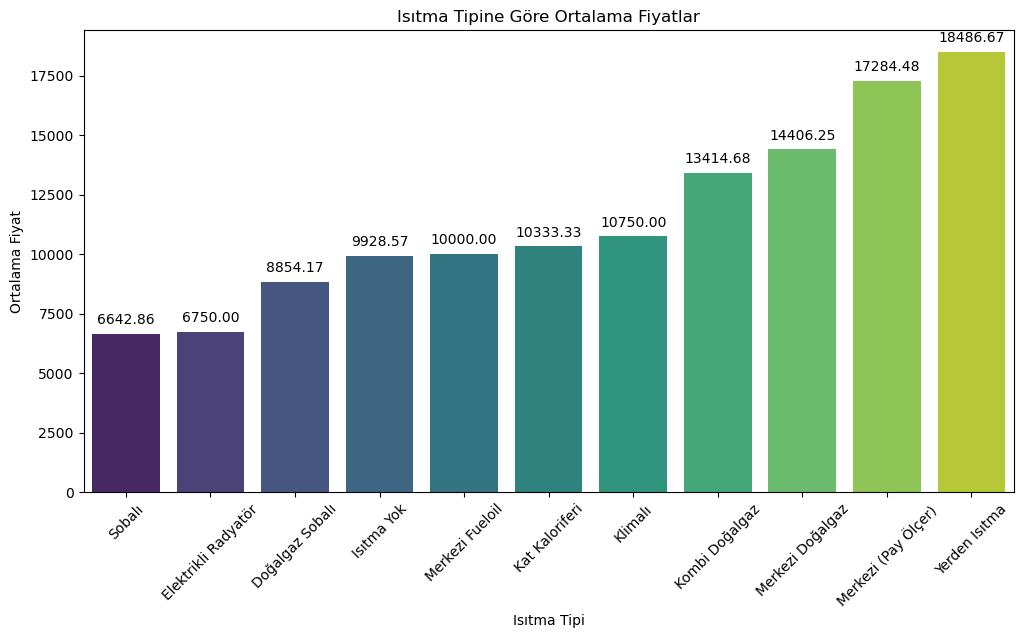

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Isıtma Tipi'ne göre gruplayıp ortalama fiyatları hesapla
isitma_tipi_fiyat_ortalama = df.groupby('Isıtma Tipi')['Fiyat'].mean().sort_values()

# Seaborn kütüphanesini kullanarak çubuk grafik çizimi
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=isitma_tipi_fiyat_ortalama.index, y=isitma_tipi_fiyat_ortalama.values, palette="viridis")

# Çubukların üzerine değerleri yazma
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Isıtma Tipine Göre Ortalama Fiyatlar')
plt.xlabel('Isıtma Tipi')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Isıtma tipi kategorilerini düşürme
df.loc[df['Isıtma Tipi'] == 'Elektrikli Radyatör', 'Isıtma Tipi'] = 'Isıtma Yok'
df.loc[df['Isıtma Tipi'] == 'Sobalı', 'Isıtma Tipi'] = 'Isıtma Yok'
df.loc[df['Isıtma Tipi'] == 'Merkezi Fueloil', 'Isıtma Tipi'] = 'Doğalgaz Sobalı'

In [17]:
# Isıtma Tipi
df["Isıtma Tipi"].value_counts()

Isıtma Tipi
Kombi Doğalgaz         528
Yerden Isıtma           75
Merkezi Doğalgaz        32
Merkezi (Pay Ölçer)     29
Doğalgaz Sobalı         25
Isıtma Yok              16
Klimalı                  6
Kat Kaloriferi           3
Name: count, dtype: int64

In [18]:
df["Eşya Durumu"].value_counts()

Eşya Durumu
Boş       351
Eşyalı    202
Name: count, dtype: int64

In [19]:
# Eşya Durumu sütunundaki NaN değerlere 'Boş' değerini ekle 
df['Eşya Durumu'].fillna('Boş', inplace=True)
df["Eşya Durumu"].isna().sum()

0

In [20]:
# Bulunduğu Kat
df["Bulunduğu Kat"].value_counts()

Bulunduğu Kat
2.Kat                165
3.Kat                134
1.Kat                108
4.Kat                 78
5.Kat                 62
Yüksek Giriş          32
Düz Giriş (Zemin)     22
Bahçe Katı            19
Çatı Dubleks          13
6.Kat                 12
8.Kat                 11
7.Kat                 10
Çatı Katı              8
9.Kat                  6
Bahçe Dublex           6
Kot 3 (-3).Kat         4
18.Kat                 3
13.Kat                 3
Kot 4 (-4).Kat         2
Villa Tipi             2
11.Kat                 2
14.Kat                 2
12.Kat                 2
Müstakil               1
19.Kat                 1
Bodrum Kat             1
Kot 2 (-2).Kat         1
17.Kat                 1
16.Kat                 1
15.Kat                 1
Kot 1 (-1).Kat         1
Name: count, dtype: int64

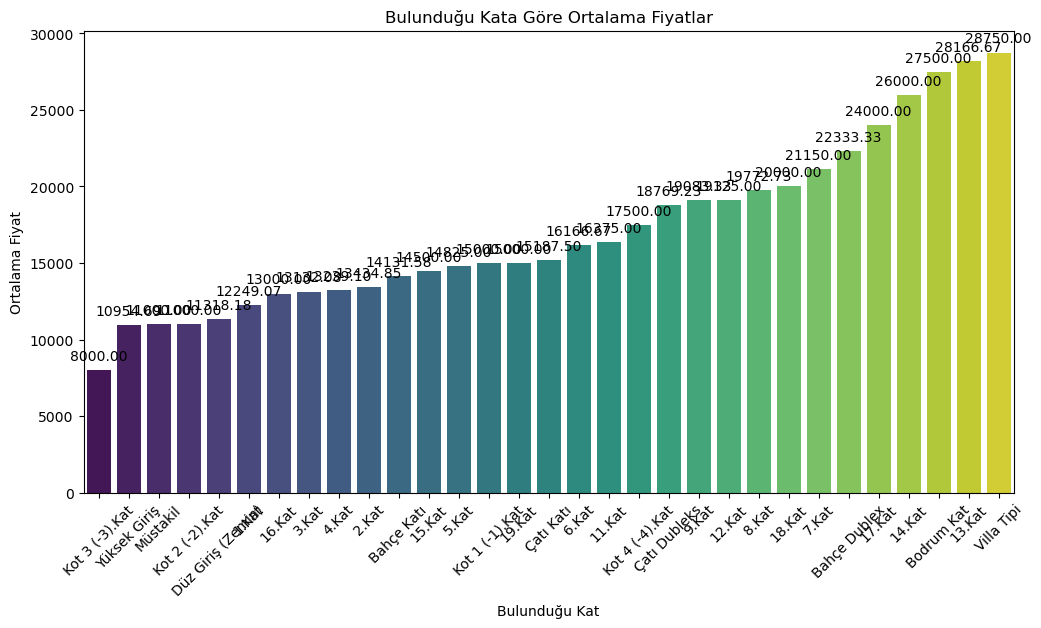

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Isıtma Tipi'ne göre gruplayıp ortalama fiyatları hesapla
bulundugu_kat_fiyat_ortalama = df.groupby('Bulunduğu Kat')['Fiyat'].mean().sort_values()

# Seaborn kütüphanesini kullanarak çubuk grafik çizimi
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bulundugu_kat_fiyat_ortalama.index, y=bulundugu_kat_fiyat_ortalama.values, palette="viridis")

# Çubukların üzerine değerleri yazma
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Bulunduğu Kata Göre Ortalama Fiyatlar')
plt.xlabel('Bulunduğu Kat')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=45)
plt.show()


In [22]:
# Kat gruplarını belirleme fonksiyonu
def kat_grubu_belirle(kat):
    if kat in ['Yüksek Giriş', 'Düz Giriş (Zemin)', 'Bahçe Katı', 'Müstakil']:
        return 'Giriş Katlar'
    elif kat in ['1.Kat', '2.Kat', '3.Kat', '4.Kat']:
        return 'Düşük Katlar[1-4]'
    elif kat in ['5.Kat', '6.Kat', '7.Kat', '8.Kat', '10.Kat']:
        return 'Orta Katlar[5-10]'
    elif 'Kat' in kat:
        kat_num_str = ''.join(filter(str.isdigit, kat))
        if kat_num_str and int(kat_num_str) > 10:
            return 'Yüksek Katlar[10+]'
    elif 'Çatı Dubleks' in kat:
        return 'Dublex'
    elif kat in ['Bahçe Dublex', 'Villa Tipi']:
        return 'Dublex'
    else:
        return 'Droplama'

# Yeni sınıflandırma sütunu ekleyin
df['Kat Grubu'] = df['Bulunduğu Kat'].apply(kat_grubu_belirle)

# 'Kat Grubu' sütunundaki 'None' değerleri 'Çatı Katı' ile doldur çünkü Yukardaki sınıflandırmada o eksik
df['Kat Grubu'] = df['Kat Grubu'].fillna('Çatı Katı')

# 'Droplama' kategorisine ait satırları dropla
df = df[df['Kat Grubu'] != 'Droplama']

df.head()


,Lokasyon,Yapı Durumu,Site İçerisinde,Oda Sayısı,Net Metrekare,Isıtma Tipi,Eşya Durumu,Bulunduğu Kat,Binanın Yaşı,Binanın Kat Sayısı,Balkon Durumu,Banyo Sayısı,WC Sayısı,Aidat,Fiyat,Kat Grubu
0,Bursa - Yıldırım - Musababa Mh.,İkinci El,Hayır,3+1,100 M2,Doğalgaz Sobalı,Boş,2.Kat,21 Ve Üzeri,5.0,Var,1,1,100 TL,8000.0,Düşük Katlar[1-4]
1,Bursa - Osmangazi - Güneştepe Mh.,Sıfır,Hayır,3+1,105 M2,Kombi Doğalgaz,Boş,4.Kat,0 (Yeni),9.0,Var,2,NaN,NaN,16000.0,Düşük Katlar[1-4]
2,Bursa - Yıldırım - Piremir Mh.,İkinci El,Hayır,1 Oda,50 M2,Doğalgaz Sobalı,Boş,Yüksek Giriş,21 Ve Üzeri,3.0,Yok,1,NaN,2 TL,6000.0,Giriş Katlar
3,Bursa - Nilüfer - Karaman Mh.,İkinci El,Evet,3+1,120 M2,Kombi Doğalgaz,Boş,4.Kat,21 Ve Üzeri,5.0,Var,1,2,200 TL,15000.0,Düşük Katlar[1-4]
4,Bursa - Gürsu - Kurtuluş Mh.,İkinci El,Hayır,2+1,90 M2,Kombi Doğalgaz,Boş,Düz Giriş (Zemin),11-15,4.0,Yok,1,2,0 TL,9000.0,Giriş Katlar


In [23]:
# 'Bulunduğu Kat' sütununu dropla
df.drop(columns=['Bulunduğu Kat'], inplace=True)
df["Kat Grubu"].value_counts()

Kat Grubu
Düşük Katlar[1-4]     485
Orta Katlar[5-10]      95
Giriş Katlar           74
Yüksek Katlar[10+]     24
Dublex                 21
Çatı Katı              15
Name: count, dtype: int64

In [24]:
# Binanın yaşı
df["Binanın Yaşı"].value_counts()

Binanın Yaşı
21 Ve Üzeri    202
5-10           148
0 (Yeni)       100
16-20           76
11-15           75
4               46
3               28
1               22
2               17
Name: count, dtype: int64

In [25]:
# Binanın kat sayısı
df["Binanın Kat Sayısı"].value_counts()

Binanın Kat Sayısı
5.0     244
4.0     186
3.0      93
6.0      54
2.0      30
8.0      24
7.0      17
10.0     12
9.0      11
14.0      9
15.0      8
11.0      7
13.0      6
22.0      6
30.0      2
19.0      1
21.0      1
12.0      1
1.0       1
16.0      1
Name: count, dtype: int64

In [26]:
# Balkon Durumu
df["Balkon Durumu"].value_counts()

Balkon Durumu
Var    277
Yok     28
Name: count, dtype: int64

In [27]:
df["Balkon Durumu"].isna().sum()

409

In [28]:
# 'Balkon Durumu' sütunundaki NaN değerlere 'Var' değerini atama
# Not : Araştırmalarıma göre girilmeyen değelerin genelde 1 balkon sayısı olduğu tespit edildi
df['Balkon Durumu'].fillna('Var', inplace=True)

In [29]:
df["Balkon Durumu"].isna().sum()

0

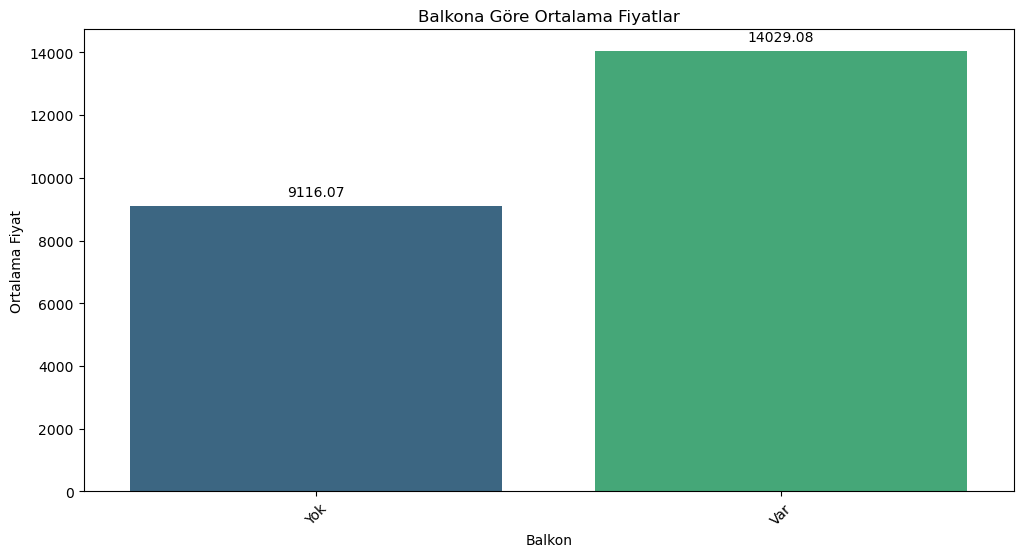

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Isıtma Tipi'ne göre gruplayıp ortalama fiyatları hesapla
balkon_ortalama = df.groupby('Balkon Durumu')['Fiyat'].mean().sort_values()

# Seaborn kütüphanesini kullanarak çubuk grafik çizimi
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=balkon_ortalama.index, y=balkon_ortalama.values, palette="viridis")

# Çubukların üzerine değerleri yazma
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Balkona Göre Ortalama Fiyatlar')
plt.xlabel('Balkon')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Banyo sayısı
# 'Yok' olan değerleri 0'a çevir
df['Banyo Sayısı'] = df['Banyo Sayısı'].apply(lambda x: 0 if x == 'Yok' else int(x))

In [32]:
# WC Sayısı
df["WC Sayısı"].value_counts()

WC Sayısı
1      115
2       88
3        9
Yok      1
Name: count, dtype: int64

In [33]:
# WC Sayısı sütunundaki "Yok" değerlerini 0 ile değiştirme
df['WC Sayısı'].replace('Yok', 0, inplace=True)
# WC Sayısı sütunundaki NaN değeleri 0 ile değiştirme
df['WC Sayısı'].fillna( 0, inplace=True)
df['WC Sayısı'].isna().sum()

0

In [34]:
# Aidat sütununu temizleme ve sayısal formata dönüştürme
df['Aidat'] = df['Aidat'].replace('[^\d,]', '', regex=True).str.replace(',', '.').astype(float)

# Aidat sütunundaki NaN değeleri 0 ile değiştirme
df['Aidat'].fillna( 0, inplace=True)
df["Aidat"].isna().sum()

0

In [35]:
# Aidat
df["Aidat"].value_counts()

Aidat
0.0       556
100.0      25
50.0       18
250.0      14
200.0      14
150.0      12
500.0       9
20.0        7
400.0       6
300.0       4
600.0       4
750.0       4
450.0       4
10.0        3
75.0        3
175.0       3
350.0       3
80.0        3
1000.0      2
950.0       2
1.0         2
1450.0      2
120.0       2
2700.0      1
1700.0      1
5000.0      1
130.0       1
2.0         1
2000.0      1
900.0       1
3000.0      1
365.0       1
635.0       1
550.0       1
1200.0      1
Name: count, dtype: int64

In [36]:
df.isna().sum()

Lokasyon              0
Yapı Durumu           0
Site İçerisinde       0
Oda Sayısı            0
Net Metrekare         0
Isıtma Tipi           0
Eşya Durumu           0
Binanın Yaşı          0
Binanın Kat Sayısı    0
Balkon Durumu         0
Banyo Sayısı          0
WC Sayısı             0
Aidat                 0
Fiyat                 0
Kat Grubu             0
dtype: int64

In [37]:
#DataFrame'i excel dosyasına yaz
excel_file_path = r'../algoritmalar/DüzeltilmişEmlakVerileri.xlsx'
df.to_excel(excel_file_path, index=False)

## Sayısallaştırma 

In [38]:
df.head()

,Lokasyon,Yapı Durumu,Site İçerisinde,Oda Sayısı,Net Metrekare,Isıtma Tipi,Eşya Durumu,Binanın Yaşı,Binanın Kat Sayısı,Balkon Durumu,Banyo Sayısı,WC Sayısı,Aidat,Fiyat,Kat Grubu
0,Bursa - Yıldırım - Musababa Mh.,İkinci El,Hayır,3+1,100 M2,Doğalgaz Sobalı,Boş,21 Ve Üzeri,5.0,Var,1,1,100.0,8000.0,Düşük Katlar[1-4]
1,Bursa - Osmangazi - Güneştepe Mh.,Sıfır,Hayır,3+1,105 M2,Kombi Doğalgaz,Boş,0 (Yeni),9.0,Var,2,0,0.0,16000.0,Düşük Katlar[1-4]
2,Bursa - Yıldırım - Piremir Mh.,İkinci El,Hayır,1 Oda,50 M2,Doğalgaz Sobalı,Boş,21 Ve Üzeri,3.0,Yok,1,0,2.0,6000.0,Giriş Katlar
3,Bursa - Nilüfer - Karaman Mh.,İkinci El,Evet,3+1,120 M2,Kombi Doğalgaz,Boş,21 Ve Üzeri,5.0,Var,1,2,200.0,15000.0,Düşük Katlar[1-4]
4,Bursa - Gürsu - Kurtuluş Mh.,İkinci El,Hayır,2+1,90 M2,Kombi Doğalgaz,Boş,11-15,4.0,Yok,1,2,0.0,9000.0,Giriş Katlar


In [39]:
# 'Net Metrekare' sütunundaki sayısal değerleri çıkar
df['Net Metrekare'] = df['Net Metrekare'].str.extract('(\d+)').astype(float)

In [40]:
# Yapı Durumu
df['Yapı Durumu'] = df['Yapı Durumu'].apply(lambda durum: 0 if 'İkinci El' in durum else 1)

# Site İçerisinde
df['Site İçerisinde'] = df['Site İçerisinde'].apply(lambda durum: 0 if 'Hayır' in durum else 1)

# Eşya Durumu
df['Eşya Durumu'] = df['Eşya Durumu'].apply(lambda durum: 0 if 'Boş' in durum else 1)

# Balkon Durumu
df['Balkon Durumu'] = df['Balkon Durumu'].apply(lambda durum: 0 if 'Yok' in durum else 1)

from sklearn.preprocessing import LabelEncoder

# LabelEncoder'ı bir kere tanımla
label_encoder = LabelEncoder()

# Lokasyon
df['Lokasyon'] = label_encoder.fit_transform(df['Lokasyon'])

# Oda Sayısı
df['Oda Sayısı'] = label_encoder.fit_transform(df['Oda Sayısı'])

# Isıtma Tipi
df['Isıtma Tipi'] = label_encoder.fit_transform(df['Isıtma Tipi'])

# Binanın Yaşı
df['Binanın Yaşı'] = label_encoder.fit_transform(df['Binanın Yaşı'])

# Kat Grubu
df['Kat Grubu'] = label_encoder.fit_transform(df['Kat Grubu'])


In [41]:
df.head()

,Lokasyon,Yapı Durumu,Site İçerisinde,Oda Sayısı,Net Metrekare,Isıtma Tipi,Eşya Durumu,Binanın Yaşı,Binanın Kat Sayısı,Balkon Durumu,Banyo Sayısı,WC Sayısı,Aidat,Fiyat,Kat Grubu
0,155,0,0,7,100.0,0,0,5,5.0,1,1,1,100.0,8000.0,1
1,97,1,0,7,105.0,4,0,0,9.0,1,2,0,0.0,16000.0,1
2,158,0,0,0,50.0,0,0,5,3.0,0,1,0,2.0,6000.0,2
3,62,0,1,7,120.0,4,0,5,5.0,1,1,2,200.0,15000.0,1
4,17,0,0,4,90.0,4,0,2,4.0,0,1,2,0.0,9000.0,2


In [42]:
# df'i Excel dosyasına kaydetme
df.to_excel('../algoritmalar/SayısalEmlakVerileri.xlsx', index=False)

## Algoritmalar

In [43]:
from sklearn.model_selection import train_test_split

# Bağımlı değişken
y = df['Fiyat']

# Bağımsız değişkenler
X = df[['Lokasyon', 
        'Kat Grubu',
        'Oda Sayısı',
        'Isıtma Tipi',
        'Binanın Yaşı',
        'Site İçerisinde',
        'Eşya Durumu',
        'Balkon Durumu',
        'Yapı Durumu',
        'Net Metrekare',
        'Binanın Kat Sayısı',
        'Banyo Sayısı',
        'WC Sayısı',
        'Aidat'
        ]]

# Train ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Lineer Regresyon
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [45]:
# Lasso Regresyon
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [46]:
# Support Vector Regresyon
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

In [47]:
# Karar Ağaçları
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [48]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [49]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [50]:
# K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [51]:
# Ridge Regresyon
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [52]:
from sklearn.metrics import r2_score

# Modellerinizi eğitin ve tahminleri yapın
models = [linear_model,  ridge_model, svr_model, lasso_model, dt_model, rf_model, gb_model, knn_model]
model_names = ["Linear Regression","Ridge Regression" ,"Support Vector Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "K-Nearest Neighbors"]

r2_scores = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"{name} R-Squared Score: {r2}")

# En iyi modeli seçin
best_model_index = r2_scores.index(max(r2_scores))
best_model = models[best_model_index]
best_model_name = model_names[best_model_index]

print(f"\nEn İyi Model: {best_model_name}")

# joblib ile modeli kaydet
import joblib
joblib.dump(best_model, "../algoritmalar/emlak_best_model.pkl")

Linear Regression R-Squared Score: 0.46137255243145525
Ridge Regression R-Squared Score: 0.4623321801189063
Support Vector Regression R-Squared Score: -0.0026826594554469896
Lasso Regression R-Squared Score: 0.46170722952009535
Decision Tree R-Squared Score: 0.17898218454015258
Random Forest R-Squared Score: 0.46451108492322624
Gradient Boosting R-Squared Score: 0.524145598295366
K-Nearest Neighbors R-Squared Score: 0.35083951114171896

En İyi Model: Gradient Boosting


['../algoritmalar/emlak_best_model.pkl']